# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, \
                  names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", \
                         "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", \
                         "50K"], skipinitialspace=True)

In [3]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [4]:
n_male = list(data['sex']).count('Male')
n_female = list(data['sex']).count('Female')
print('В выборку %s мужчин и %s женщин' % (n_male, n_female))

В выборку 21790 мужчин и 10771 женщин


### Вопрос 2
Каков средний возраст мужчин?


In [5]:
np.mean(data[data['sex'] == 'Male']['age'])

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [6]:
len(data[data['native-country'] == 'United-States']) / len(data)

0.895857006848684

### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

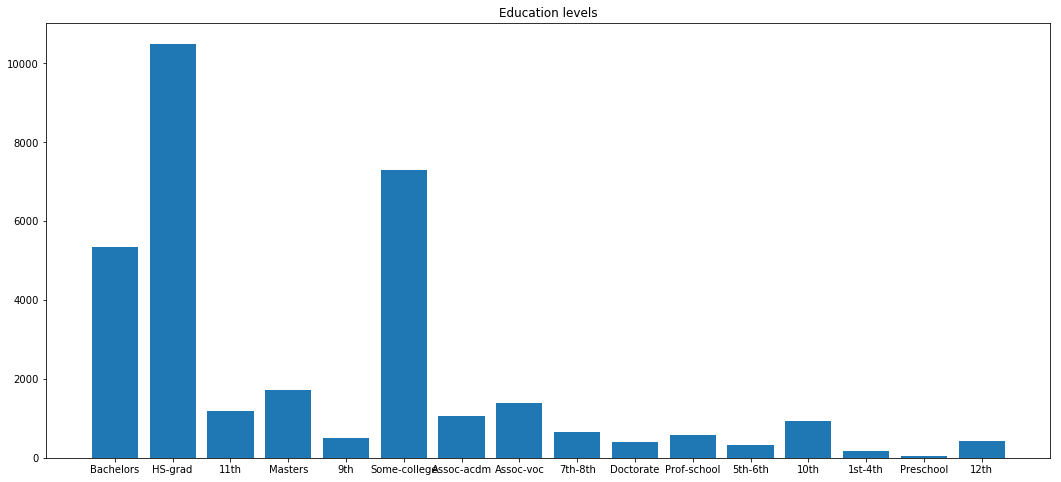

In [8]:
education_levels = pd.unique(data['education'])
heights = [list(data['education']).count(lvl) for lvl in education_levels]

y_pos = np.arange(len(education_levels))

plt.figure(figsize=(18, 8))
plt.bar(y_pos, heights, align='center', alpha=1)
plt.xticks(y_pos, education_levels)
plt.title('Education levels')
plt.show()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [9]:
mean = np.mean(data[data['marital-status'] == 'Divorced']['fnlwgt'])
std0 = np.std(data[data['marital-status'] == 'Divorced']['fnlwgt'])
std1 = np.std(data[data['marital-status'] == 'Divorced']['fnlwgt'], ddof=1)

print('Среднее значение: %s, \nСтандартное отклонение как корень из смещенной оценки выборочной дисперсии: %s, \n\
Стандартное отклонение как корень из несмещенной оценки выборочной дисперсии: %s' % (mean, std0, std1))

Среднее значение: 185802.79045689848, 
Стандартное отклонение как корень из смещенной оценки выборочной дисперсии: 105634.89966249917, 
Стандартное отклонение как корень из несмещенной оценки выборочной дисперсии: 105646.78945933603


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

К высшему образованию будем относить уровни образования Bachelors, Masters, Doctorate

In [10]:
data1 = data[data['50K'] == '>50K']

higher_education = ['Bachelors', 'Masters', 'Doctorate']

percent = sum([len(data1[data1['education'] == lvl]) for lvl in higher_education]) / len(data1)

print(percent, 'людей, зарабатывающих более 50 тыс. имеют высшее образование')

0.4445861497258003 людей, зарабатывающих более 50 тыс. имеют высшее образование


Менее половины людей, зарабатывающих более 50 тыс., имеют высшее образование

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [11]:
table = []

for race in pd.unique(data['race']):
    for sex in ['Male', 'Female']:
        table.append([race, sex, max(data[(data['race'] == race) & (data['sex'] == sex)]['age'])])

pd.DataFrame(table, columns=['Race', 'Sex', 'Max age'])

,Race,Sex,Max age
0,White,Male,90
1,White,Female,90
2,Black,Male,90
3,Black,Female,90
4,Asian-Pac-Islander,Male,90
5,Asian-Pac-Islander,Female,75
6,Amer-Indian-Eskimo,Male,82
7,Amer-Indian-Eskimo,Female,80
8,Other,Male,77
9,Other,Female,74


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [12]:
countries = pd.unique(data[data['occupation'] == 'Farming-fishing']['native-country'])
print('Фермеры/рыбаки живут в следующих странах:')
for x in countries:
    print(x)

Фермеры/рыбаки живут в следующих странах:
United-States
Cambodia
Poland
Guatemala
Mexico
England
?
Philippines
Italy
Puerto-Rico
Vietnam
Germany
Japan
Canada
Yugoslavia
Cuba
Portugal
El-Salvador
Hong
Ireland
France


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [13]:
male = len(data[(data['sex'] == 'Male') & (data['education'] == 'Bachelors')]) / len(data[(data['sex'] == 'Male') & (data['education'] == 'Masters')])

female = len(data[(data['sex'] == 'Female') & (data['education'] == 'Bachelors')]) / len(data[(data['sex'] == 'Female') & (data['education'] == 'Masters')])

print('Отношение для мужчин: %s, отношение для женщин: %s. Первое больше.' % (male, female))

Отношение для мужчин: 3.14743049705139, отношение для женщин: 3.0205223880597014. Первое больше.


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [14]:
print('Максимальное количество рабочих часов равно', max(data['hours-per-week']))

Максимальное количество рабочих часов равно 99


In [15]:
print(list(data['hours-per-week']).count(99), 'человек работают 99 часов')

85 человек работают 99 часов


In [16]:
print('Только %s из них зарабатывают более 50 тыс.' % list(data[data['hours-per-week'] == 99]['50K']).count('>50K'))

Только 25 из них зарабатывают более 50 тыс.
